#  Stones2Milestones

## Internship Assignment 

Q). We are sharing data for our live demo classes right from parent showing interest to their
conversion (Parent bought the live classes pack).

Following are the details of the data:
1. Interested Users – Users (child) who have showed interest in joining the demo classes.
2. Booked Users – Users who booked a trail class on our portal. There are cases where duplicate trails are possible, count both.
3. Trainers – Trainers assigned to Trail Batch.
4. Subscription Bought – Details of Sales that are made. Use only those cases where sale value is greater than equal to 499/-.

Using these data, create tables to track the following:
1. Sales conversion with respect to Trainers
2. Sales conversion with respect to Time slot
3. Sales conversion with respect to Topic
4. Sales conversion with respect to Source (Field available in Interested Users)
5. Sales conversion wrt grade
6. Time taken for Sales conversion
7. Time slot – attendance %

Perform this analysis on whatever tools you are comfortable with (Excel, Google Sheets,
Python).

## Loading the Dataset and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot

In [2]:
init_notebook_mode(connected=True)
cufflinks.go_offline()

In [3]:
# Method of loading multiple excel sheets in the notebook.

df = pd.read_excel('assignment_data (1).xlsx',sheet_name=['Interested Users'])
df_interested_users = pd.concat(df[frame] for frame in df.keys())
df_interested_users.head(2)

,Child name,phone,email_id,school,grade,batch_preferred,source,Submitted At
0,CH_30001,911100221000,s2m_test_20001@tests2m.com,St.paul's school,Grade 2,"Afternoon Batch (4:00 - 4:45 PM), Evening Batc...",lastchance,2020-04-16 08:46:39
1,CH_30002,911100221001,s2m_test_20002@tests2m.com,K L E School haveri,Grade 4,"Evening Batch (6:15 - 7:00 PM), Morning Batch ...",lastchance,2020-04-16 08:47:55


In [4]:
df = pd.read_excel('assignment_data (1).xlsx',sheet_name=['Booked Users'])
df_booked_users = pd.concat(df[frame] for frame in df.keys())
df_booked_users.head(2)

,Invitee UUID,Batch,Enrolment Type,Child Name,Grade,School,Phone,Parent Email,Opted Start Time,Opted Start Date,Facilitator UUID,Attendance
0,AGIV7AYTBF4ZA6SA,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31440,Grade 2,DPS,911100222445,s2m_test_21459@tests2m.com,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",AEFDOHX57EFVUS2G,Present
1,HAPQZDZXDJPMFZ73,"fREADom Trial Class - Grades 1, 2 [I] 11:15am ...",Trial,CH_31441,Grade 2,DPS,911100222446,s2m_test_21460@tests2m.com,16-04-2020 11:15:00,"11:15am - Thursday, April 16, 2020",AEFDOHX57EFVUS2G,Present


In [5]:
df = pd.read_excel('assignment_data (1).xlsx',sheet_name=['Trainers'])
df_trainers = pd.concat(df[frame] for frame in df.keys())
df_trainers.head(2)

,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Rocking with rhymes
1,FAC_5002,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,9.0,trial I,In my mind's eye


In [6]:
df = pd.read_excel('assignment_data (1).xlsx',sheet_name=['Subscription Bought'])
df_subscription_bought = pd.concat(df[frame] for frame in df.keys())
df_subscription_bought.head(2)

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
0,CH_31846,9.111002e+11,s2m_test_21890@tests2m.com,16-03-2020 12:00:00 AM,SP_1001,2,199,0.5,NaN,NaN
1,CH_31847,9.111002e+11,NaN,16-03-2020 12:00:00 AM,SP_1002,4,199,0.5,NaN,NaN


In [7]:
# Filtering data

df_subscription_bought.columns

Index(['Child Name', 'Registered Number', 'Registered Email ID',
       'Payment date', 'Sale by', 'Grade', 'Pricing', 'Duration',
       'Sessions preferred', 'Live session details'],
      dtype='object')

In [8]:
df_subscription_bought['Pricing'].value_counts()

1999           213
199            139
999             43
3400             6
Multichild       5
2000             4
1996             2
699              1
95381 45678      1
100              1
99               1
399              1
1995             1
Name: Pricing, dtype: int64

# Exploratory Data Analysis

In [9]:
df_subscription_bought[df_subscription_bought['Pricing']=='Multichild']

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
104,CH_31902,9.111002e+11,s2m_test_21946@tests2m.com,27-03-2020 12:00:00 AM,SP_1006,4,Multichild,8G,NaN,Live - Upsell (Larger plan)
352,CH_30835,9.111002e+11,s2m_test_20829@tests2m.com,22-04-2020 2:39:45 PM,SP_1012,4,Multichild,NaN,Assigned,Live - Upsell (Larger plan)
363,CH_32013,9.111002e+11,s2m_test_21022@tests2m.com,23-04-2020 5:49:24 PM,SP_1005,5,Multichild,10G+1yr,Assigned,NaN
398,CH_31412,NaN,s2m_test_20670@tests2m.com,26-04-2020 12:00:00 AM,SP_1001,NaN,Multichild,12G + 1yr,Assigned,NaN
406,CH_32077,9.111002e+11,s2m_test_21083@tests2m.com,2020-04-27 00:00:00,SP_1009,3,Multichild,12G+1tr +assesment,Assigned,NaN


### We have a string value in the Pricing column, I am assuming that the user paid for more than 1 child and the amount is more than Rs.499/-.

### Therefore, replacing the value 'Multichild' with an amount more than 499.

In [10]:
df_subscription_bought['Pricing'] = df_subscription_bought['Pricing'].replace({'Multichild':500})

In [11]:
df_subscription_bought['Pricing'].value_counts()

1999           213
199            139
999             43
3400             6
500              5
2000             4
1996             2
699              1
95381 45678      1
100              1
99               1
399              1
1995             1
Name: Pricing, dtype: int64

In [12]:
df_subscription_bought[df_subscription_bought['Pricing']=='95381 45678']

# I think there has been a misprint in the pricing column where child name = CH_32008.
# Let us know more about the price on the basis of Duration column i.e. 12G + 1y

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
250,CH_32008,9.111002e+11,s2m_test_22088@tests2m.com,2020-12-04 15:03:17,SP_1001,1,95381 45678,12G + 1y,SCJ/13042020/Batch 3,Live - Upsell (Larger plan)


In [13]:
df_subscription_bought['Duration'].value_counts().sort_values(ascending=False)[:10]

1             96
12G + 1 yr    26
12G + 1y      19
8G            18
12G           14
10G+2I        13
10G           13
12G + 1yr     12
6G            11
5G            10
Name: Duration, dtype: int64

In [14]:
df_subscription_bought[df_subscription_bought['Duration']=='12G + 1 yr'][['Duration','Pricing']]

,Duration,Pricing
219,12G + 1 yr,1999
224,12G + 1 yr,1999
277,12G + 1 yr,1999
278,12G + 1 yr,1999
282,12G + 1 yr,1999
283,12G + 1 yr,1999
285,12G + 1 yr,1999
286,12G + 1 yr,1999
288,12G + 1 yr,1999
289,12G + 1 yr,1999


In [15]:
# Therefore the price on the basis of duration for 12G + 1y is Rs.1999. 
# So, we will be replacing the incorrect value now.

df_subscription_bought['Pricing'] = df_subscription_bought['Pricing'].replace({'95381 45678':1999})

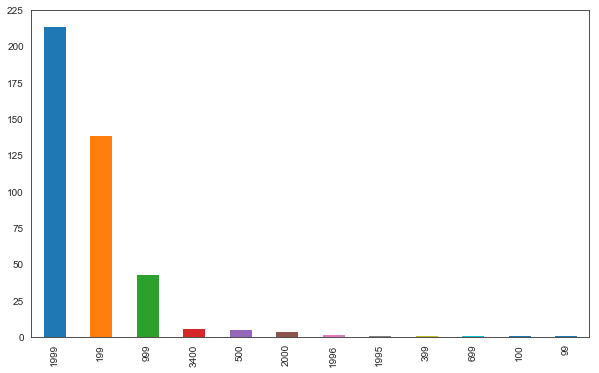

In [16]:
plt.figure(figsize=(10,6))
sns.set_style(style='white')
df_subscription_bought['Pricing'].value_counts().plot(kind='bar')

In [17]:
round((df_subscription_bought['Pricing'].value_counts().sort_values(ascending=False)/
       df_subscription_bought['Pricing'].count())*100,2)

# In %age form.

1999    51.20
199     33.25
999     10.29
3400     1.44
500      1.20
2000     0.96
1996     0.48
99       0.24
100      0.24
699      0.24
399      0.24
1995     0.24
Name: Pricing, dtype: float64

## Filter:  

### Subscription Bought – Details of Sales that are made. Use only those cases where sale value is greater than equal to 499/-.


In [18]:
df_subscription_bought2 = df_subscription_bought[df_subscription_bought['Pricing']>499]

In [19]:
df_subscription_bought2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 12 to 417
Data columns (total 10 columns):
Child Name              265 non-null object
Registered Number       272 non-null float64
Registered Email ID     256 non-null object
Payment date            276 non-null object
Sale by                 255 non-null object
Grade                   264 non-null object
Pricing                 276 non-null int64
Duration                268 non-null object
Sessions preferred      236 non-null object
Live session details    217 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 23.7+ KB


In [20]:
df_subscription_bought2['Child Name'].nunique()

253

In [21]:
df_subscription_bought2['Child Name'].count()

265

In [22]:
print(df_interested_users['Child name'].count())
print(df_interested_users['Child name'].nunique())

1683
1439


In [23]:
# Merging df_interested_users and df_subscription_bougth on Child Name column
# to know which child name was converted into a sale.

df_interested_users.rename(columns={'Child name':'Child Name'},inplace=True)

df_sales = pd.concat([df_interested_users, df_subscription_bought2], axis=1, join='inner')


In [24]:
df_sales[:2]

,Child Name,phone,email_id,school,grade,batch_preferred,source,Submitted At,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
12,CH_30012,911100221012,s2m_test_20013@tests2m.com,The SHRI ram UNIVERSAL SCHOOL jakh,Grade 1,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:57:57,CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,NaN,2,999,4G+1I,NaN,Live - Upsell (Larger plan)
15,CH_30015,911100221015,s2m_test_20016@tests2m.com,Indus Valley World School,Grade 2,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 09:06:17,CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,NaN,4,1999,12G,NaN,Live - Upsell (Larger plan)


In [25]:
df_sales.shape

(276, 18)

In [26]:
df_sales.head(2)

,Child Name,phone,email_id,school,grade,batch_preferred,source,Submitted At,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
12,CH_30012,911100221012,s2m_test_20013@tests2m.com,The SHRI ram UNIVERSAL SCHOOL jakh,Grade 1,"Morning Batch (11:15 - 12:00 PM), Evening Batc...",lastchance,2020-04-16 08:57:57,CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,NaN,2,999,4G+1I,NaN,Live - Upsell (Larger plan)
15,CH_30015,911100221015,s2m_test_20016@tests2m.com,Indus Valley World School,Grade 2,"Evening Batch (6:15 - 7:00 PM), Afternoon Batc...",lastchance,2020-04-16 09:06:17,CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,NaN,4,1999,12G,NaN,Live - Upsell (Larger plan)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

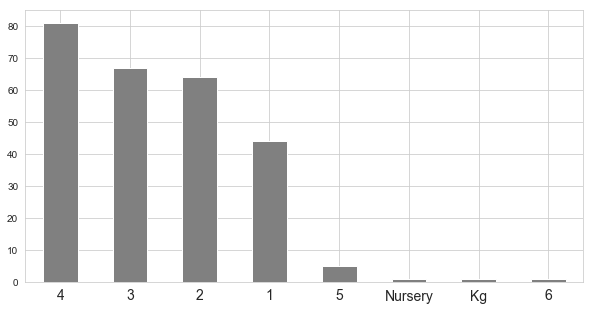

In [27]:
plt.figure(figsize=(10,5))
sns.set_style(style='whitegrid')
df_sales['Grade'].value_counts().plot(kind='bar',color='gray')
plt.xticks(rotation=360,size=14)

In [28]:
df_sales['Grade'].value_counts()

4          81
3          67
2          64
1          44
5           5
Nursery     1
Kg          1
6           1
Name: Grade, dtype: int64

### Using these data, create tables to track the following:

## 1. Sales conversion with respect to Trainers

In [29]:
df_trainers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
Trainer Name    173 non-null object
Date            174 non-null object
Timing          174 non-null object
Grade           174 non-null object
Batch size      160 non-null object
Batch count     159 non-null float64
Batch           174 non-null object
Topics          174 non-null object
dtypes: float64(1), object(7)
memory usage: 11.0+ KB


In [30]:
df_trainers[:2]

,Trainer Name,Date,Timing,Grade,Batch size,Batch count,Batch,Topics
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,"Grade 1,2",group,9.0,trial I,Rocking with rhymes
1,FAC_5002,16 April Thursday,11.15 am - 12 noon,"Grade 3,4",group,9.0,trial I,In my mind's eye


In [31]:
df_trainers['Grade'][1][6:9].split(sep=',')

['3', '4']

In [32]:
df_trainers['GradeA'] = df_trainers['Grade'].apply(lambda x : np.int(x[6:9].split(sep=',')[0]))

In [33]:
df_trainers['GradeB'] = df_trainers['Grade'].apply(lambda x : np.int(x[6:9].split(sep=',')[1]))

In [34]:
del(df_trainers['Grade'])

In [35]:
df_trainers1 = df_trainers.drop('GradeA',axis=1)

In [36]:
df_trainers2 = df_trainers.drop('GradeB',axis=1)

In [37]:
df_trainers_final = df_trainers1.append(df_trainers2,ignore_index=True,sort=True)

In [38]:
df_trainers_final.columns

df_trainers_final = df_trainers_final[['Trainer Name', 'Date', 'Timing', 'Batch size ', 'Batch count', 'Batch',
       'Topics', 'GradeA','GradeB']]

In [39]:
# Checking from which index value does the trainer name column starts over again.

df_trainers_final[172:180]

,Trainer Name,Date,Timing,Batch size,Batch count,Batch,Topics,GradeA,GradeB
172,FAC_5002,27 April Monday,6.00 pm - 6.45 pm,NaN,NaN,Trial II,Word Whiz,NaN,2.0
173,FAC_5022,27 April Monday,6.00 pm - 6.45 pm,NaN,NaN,Trial III,Rocking with rhymes,NaN,2.0
174,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,1.0,NaN
175,FAC_5002,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,In my mind's eye,3.0,NaN
176,FAC_5003,16 April Thursday,11.15 am - 12 noon,group,9.0,trial II,Word Whiz,1.0,NaN
177,FAC_5006,16 April Thursday,11.15 am - 12 noon,group,7.0,trial II,Rocking with rhymes,3.0,NaN
178,FAC_5007,16 April Thursday,4:00-4:45 pm,group,9.0,trial I,In my head or real,3.0,NaN
179,FAC_5008,16 April Thursday,4:00-4:45 pm,group,9.0,trial II,storm in my brain,3.0,NaN


In [40]:
df_trainers_final['GradeA'][0:174].fillna(df_trainers_final['GradeB'][0:174],inplace=True)

In [41]:
del(df_trainers_final['GradeB'])

In [42]:
df_trainers_final.rename(columns={'GradeA':'Grade'},inplace=True)

In [43]:
df_trainers_final.Grade.value_counts()

3.0    89
4.0    89
1.0    85
2.0    85
Name: Grade, dtype: int64

In [44]:
# Creating function to know to which classes the trainer teaches.

def trainer(name):
    classes = df_trainers_final[df_trainers_final['Trainer Name']==name]
    return(classes)

In [45]:
trainer('FAC_5007')

,Trainer Name,Date,Timing,Batch size,Batch count,Batch,Topics,Grade
4,FAC_5007,16 April Thursday,4:00-4:45 pm,group,9.0,trial I,In my head or real,4.0
178,FAC_5007,16 April Thursday,4:00-4:45 pm,group,9.0,trial I,In my head or real,3.0


In [46]:
# trainers do not teach Kg and Nursery classes. Hence romoving such rows.

df_sales2 = df_sales[(df_sales['Grade']!='Kg') & (df_sales['Grade']!='Nursery')]

In [47]:
df_sales2 = df_sales2[pd.notnull(df_sales2['Grade'])]

In [48]:
df_sales2['Grade'].unique()

array([2, 4, 1, 3, 6, 5], dtype=object)

In [49]:
df_trainers_final['Grade']=df_trainers_final['Grade'].apply(lambda x : np.int(x))

In [50]:
df_trainers_final['Grade'].value_counts()

4    89
3    89
2    85
1    85
Name: Grade, dtype: int64

In [51]:
df_trainers_final['Grade'] = df_trainers_final['Grade'].astype(int)

In [52]:
df_sales2['Grade'] = df_sales2['Grade'].astype(int)

In [53]:
df_trainers_final2 = df_trainers_final.merge(df_sales2,on='Grade',how='inner')

# This is the table that comprises of Sales conversion with respect to Trainers.

In [54]:
df_trainers_final2.columns

df_trainers_final3 =df_trainers_final2[['Trainer Name', 'Date', 'Timing', 'Batch size ', 'Batch count', 'Batch',
       'Topics', 'Grade','Registered Number', 'Pricing','Payment date', 'Sale by']]

In [55]:
df_trainers_final3[:5]

,Trainer Name,Date,Timing,Batch size,Batch count,Batch,Topics,Grade,Registered Number,Pricing,Payment date,Sale by
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,999,18-03-2020 12:00:00 AM,NaN
1,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,1999,19-03-2020 12:00:00 AM,SP_1001
2,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,1999,20-03-2020 12:00:00 AM,SP_1001
3,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,1999,24-03-2020 12:00:00 AM,SP_1005
4,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,1999,24-03-2020 10:32:31 PM,SP_1005


# 2. Sales conversion with respect to Time slot


In [56]:
df_sales.columns

Index(['Child Name', 'phone', 'email_id', 'school', 'grade', 'batch_preferred',
       'source', 'Submitted At', 'Child Name', 'Registered Number',
       'Registered Email ID', 'Payment date', 'Sale by', 'Grade', 'Pricing',
       'Duration', 'Sessions preferred', 'Live session details'],
      dtype='object')

In [57]:
# columns we need 

df_sales_time_slot = df_sales[['Child Name', 'Duration','email_id', 'school', 'grade','Grade', 'Pricing','Payment date']]

In [58]:
# This is the table which gives us sales on the basis of time slot.

df_sales_time_slot[:5]

,Child Name,Child Name,Duration,email_id,school,grade,Grade,Pricing,Payment date
12,CH_30012,CH_31858,4G+1I,s2m_test_20013@tests2m.com,The SHRI ram UNIVERSAL SCHOOL jakh,Grade 1,2,999,18-03-2020 12:00:00 AM
15,CH_30015,CH_31860,12G,s2m_test_20016@tests2m.com,Indus Valley World School,Grade 2,4,1999,18-03-2020 12:00:00 AM
23,CH_30022,CH_31868,10G+2I,s2m_test_20023@tests2m.com,Sattva,Grade 2,1,1999,19-03-2020 12:00:00 AM
27,CH_30025,CH_31872,10G+2I,s2m_test_20026@tests2m.com,B.D. Memorial,Grade 4,2,1999,19-03-2020 12:00:00 AM
31,CH_30029,CH_31876,4G+1I,s2m_test_20030@tests2m.com,Brilliant national School,Grade 3,1,999,20-03-2020 12:00:00 AM


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

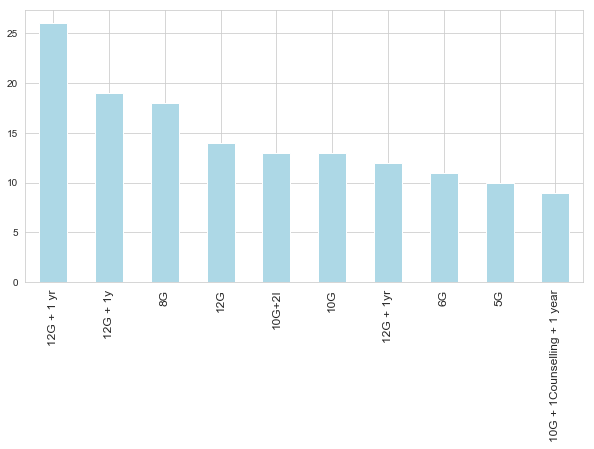

In [102]:
# Top 10 time slots that parents prefer.

plt.figure(figsize=(10,5))
df_sales_time_slot['Duration'].value_counts()[:10].plot(kind='bar',color='lightblue')
plt.xticks(size=12)

# 3. Sales conversion with respect to Topic

In [60]:
df_sales_topic = df_trainers_final2[['Trainer Name', 'Date','Topics', 'Grade',  'Registered Number', 'Pricing', 'Duration']]

In [61]:
df_sales_topic[:2]

,Trainer Name,Date,Topics,Grade,Registered Number,Pricing,Duration
0,FAC_5001,16 April Thursday,Rocking with rhymes,2,9.111002e+11,999,4G+1I
1,FAC_5001,16 April Thursday,Rocking with rhymes,2,9.111002e+11,1999,10G+2I


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

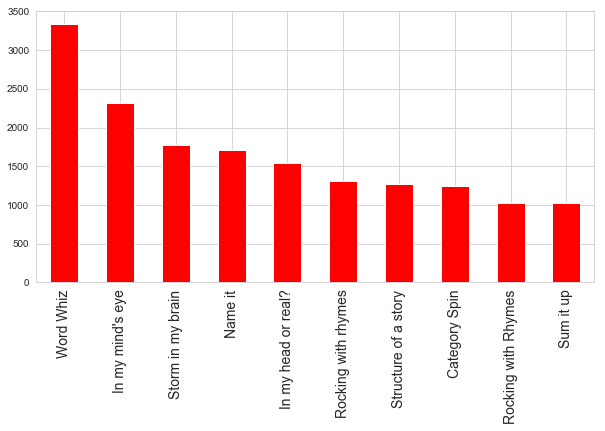

In [101]:
# Top 10 Topics trainers teach and for which parents paid subscription.

plt.figure(figsize=(10,5))
df_sales_topic['Topics'].value_counts()[:10].plot(kind='bar',color='red')
plt.xticks(size=14)

# 4. Sales conversion with respect to Source (Field available in Interested Users)


In [63]:
df_sales_source = df_sales[['source','Registered Number', 'Payment date', 'Pricing',
       'Duration']]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

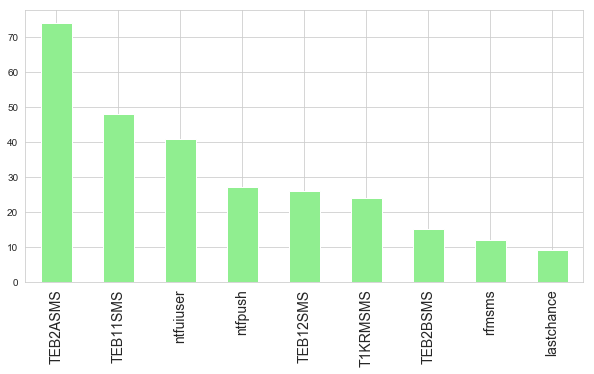

In [106]:
# Top 10 sources from which sales were occured.

plt.figure(figsize=(10,5))
df_sales_source['source'].value_counts()[:10].plot(kind='bar',color='lightgreen')
plt.xticks(size=14)

# 5. Sales conversion wrt grade


In [65]:
df_sales_grade = df_subscription_bought2

In [66]:
df_sales_grade['Grade'].value_counts()

4          81
3          67
2          64
1          44
5           5
Nursery     1
Kg          1
6           1
Name: Grade, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

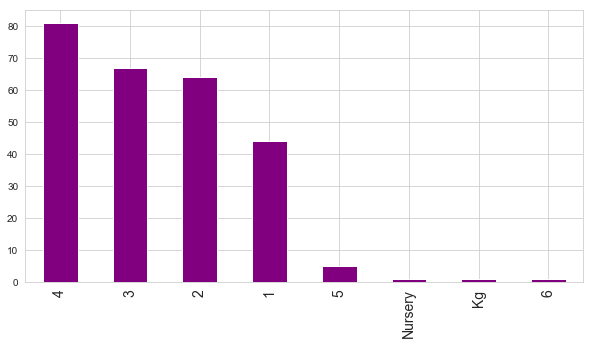

In [107]:
# Number of sales depending upon the Grade.

plt.figure(figsize=(10,5))
df_sales_grade['Grade'].value_counts().plot(kind='bar',color='purple')
plt.xticks(size=14)

# 6. Time taken for Sales conversion


In [68]:
# Merging the booked users and subscription bougth table to know who all booked and purchased the package.

df_sales_time_taken = df_booked_users.merge(df_subscription_bought2,on='Child Name')

In [69]:
df_sales_time_taken.shape

(91, 21)

In [70]:
df_sales_time_taken2 = df_sales_time_taken.drop_duplicates('Child Name')

In [71]:
df_sales_time_taken2['Child Name'].nunique()

70

In [72]:
df_sales_time_taken2 = df_sales_time_taken2[['Child Name','Opted Start Time', 'Payment date', 'Pricing']]

In [73]:
df_sales_time_taken2.head(2)

,Child Name,Opted Start Time,Payment date,Pricing
0,CH_31112,16-04-2020 11:15:00,16-04-2020 2:40:23 PM,1999
4,CH_31475,16-04-2020 16:00:00,29-03-2020 12:00:00 AM,1999


In [74]:
import time
import datetime as dt

In [75]:
df_sales_time_taken2['Opted Start Time'][:2]

0    16-04-2020 11:15:00
4    16-04-2020 16:00:00
Name: Opted Start Time, dtype: object

In [76]:
df_sales_time_taken2['Opted Start Time'] = pd.to_datetime(df_sales_time_taken2['Opted Start Time'])

In [77]:
df_sales_time_taken2['Payment date'] = pd.to_datetime(df_sales_time_taken2['Payment date'])

In [78]:
df_sales_time_taken2.dtypes

Child Name                  object
Opted Start Time    datetime64[ns]
Payment date        datetime64[ns]
Pricing                      int64
dtype: object

In [79]:
df_sales_time_taken2[:2]

,Child Name,Opted Start Time,Payment date,Pricing
0,CH_31112,2020-04-16 11:15:00,2020-04-16 14:40:23,1999
4,CH_31475,2020-04-16 16:00:00,2020-03-29 00:00:00,1999


In [80]:
(df_sales_time_taken2['Payment date'].loc[4] - df_sales_time_taken2['Opted Start Time'].loc[4])

Timedelta('-19 days +08:00:00')

In [81]:
df_sales_time_taken2['Time difference'] = df_sales_time_taken2['Payment date'] - df_sales_time_taken2['Opted Start Time']

In [82]:
# The table we need.

df_sales_time_taken2[:10]

,Child Name,Opted Start Time,Payment date,Pricing,Time difference
0,CH_31112,2020-04-16 11:15:00,2020-04-16 14:40:23,1999,0 days 03:25:23
4,CH_31475,2020-04-16 16:00:00,2020-03-29 00:00:00,1999,-19 days +08:00:00
5,CH_31479,2020-04-16 16:00:00,2020-12-04 21:18:44,1999,232 days 05:18:44
6,CH_31482,2020-04-16 16:00:00,2020-04-17 11:51:16,1999,0 days 19:51:16
7,CH_31515,2020-04-16 18:15:00,2020-04-18 10:59:59,1999,1 days 16:44:59
8,CH_31524,2020-04-16 18:15:00,2020-04-18 18:18:01,1999,2 days 00:03:01
9,CH_30793,2020-04-16 18:15:00,2020-03-31 07:26:00,999,-17 days +13:11:00
13,CH_31533,2020-04-16 18:15:00,2020-04-19 18:24:00,1999,3 days 00:09:00
15,CH_30040,2020-04-16 18:15:00,2020-08-04 17:01:20,999,109 days 22:46:20
16,CH_31542,2020-04-16 18:15:00,2020-04-20 19:22:52,1999,4 days 01:07:52


# 7. Time slot – attendance %


In [83]:
df_sales_attendance  = df_booked_users.merge(df_subscription_bought2,on='Child Name')

In [84]:
df_sales_attendance['Attendance'].isna().sum()

# For attendance colum we cannot fill null values bacause it consist of two values only i.e. present or absent 
# and for null values we cannot assume anything. Therefore removing null values.

1

In [85]:
df_sales_attendance.columns

df_sales_attendance = df_sales_attendance[['Child Name', 'Grade_x', 'Attendance', 'Payment date','Pricing']]

In [86]:
df_sales_attendance = df_sales_attendance[pd.notnull(df_sales_attendance['Attendance'])]

In [87]:
df_sales_attendance.shape

(90, 5)

In [88]:
df_sales_attendance['Attendance'].replace({'Present ':'Present'},inplace=True)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

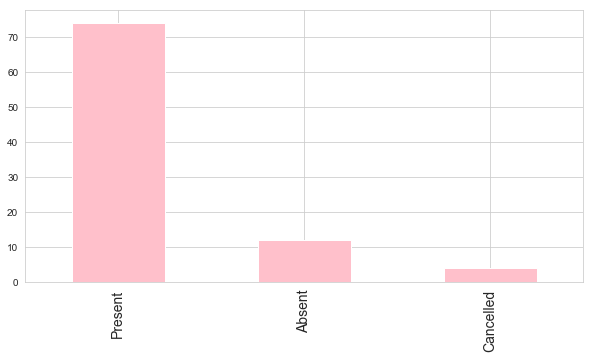

In [108]:
plt.figure(figsize=(10,5))
df_sales_attendance['Attendance'].value_counts().plot(kind='bar',color='pink')
plt.xticks(size=14)

#  Final Tables for required output.

In [90]:
# 1. Sales conversion with respect to Trainers

df_trainers_final3.head(2)

,Trainer Name,Date,Timing,Batch size,Batch count,Batch,Topics,Grade,Registered Number,Pricing,Payment date,Sale by
0,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,999,18-03-2020 12:00:00 AM,NaN
1,FAC_5001,16 April Thursday,11.15 am - 12 noon,group,9.0,trial I,Rocking with rhymes,2,9.111002e+11,1999,19-03-2020 12:00:00 AM,SP_1001


In [91]:
# 2. Sales conversion with respect to Time slot

df_sales_time_slot.head(2)

,Child Name,Child Name,Duration,email_id,school,grade,Grade,Pricing,Payment date
12,CH_30012,CH_31858,4G+1I,s2m_test_20013@tests2m.com,The SHRI ram UNIVERSAL SCHOOL jakh,Grade 1,2,999,18-03-2020 12:00:00 AM
15,CH_30015,CH_31860,12G,s2m_test_20016@tests2m.com,Indus Valley World School,Grade 2,4,1999,18-03-2020 12:00:00 AM


In [92]:
# 3. Sales conversion with respect to Topic

df_sales_topic[:2]

,Trainer Name,Date,Topics,Grade,Registered Number,Pricing,Duration
0,FAC_5001,16 April Thursday,Rocking with rhymes,2,9.111002e+11,999,4G+1I
1,FAC_5001,16 April Thursday,Rocking with rhymes,2,9.111002e+11,1999,10G+2I


In [93]:
# 4. Sales conversion with respect to Source (Field available in Interested Users)

df_sales_source[:2]

,source,Registered Number,Payment date,Pricing,Duration
12,lastchance,9.111002e+11,18-03-2020 12:00:00 AM,999,4G+1I
15,lastchance,9.111002e+11,18-03-2020 12:00:00 AM,1999,12G


In [94]:
# 5. Sales conversion wrt grade

df_sales_grade[:2]

,Child Name,Registered Number,Registered Email ID,Payment date,Sale by,Grade,Pricing,Duration,Sessions preferred,Live session details
12,CH_31858,9.111002e+11,s2m_test_21900@tests2m.com,18-03-2020 12:00:00 AM,NaN,2,999,4G+1I,NaN,Live - Upsell (Larger plan)
15,CH_31860,9.111002e+11,s2m_test_21903@tests2m.com,18-03-2020 12:00:00 AM,NaN,4,1999,12G,NaN,Live - Upsell (Larger plan)


In [95]:
# 6. Time taken for Sales conversion

df_sales_time_taken2[:2]

,Child Name,Opted Start Time,Payment date,Pricing,Time difference
0,CH_31112,2020-04-16 11:15:00,2020-04-16 14:40:23,1999,0 days 03:25:23
4,CH_31475,2020-04-16 16:00:00,2020-03-29 00:00:00,1999,-19 days +08:00:00


In [96]:
# 7. Time slot – attendance %

df_sales_attendance[:2]

,Child Name,Grade_x,Attendance,Payment date,Pricing
0,CH_31112,Grade 1,Present,16-04-2020 2:40:23 PM,1999
1,CH_31112,Grade 4,Present,16-04-2020 2:40:23 PM,1999
